In [1]:
!pip install -q tensorflow pandas nltk sklearn

     |████████████████████████████████| 261 kB 16.9 MB/s 
     |████████████████████████████████| 308 kB 65.9 MB/s 
     |████████████████████████████████| 596 kB 56.0 MB/s 
     |████████████████████████████████| 3.1 MB 51.2 MB/s 
     |████████████████████████████████| 303 kB 72.8 MB/s 
     |████████████████████████████████| 10.9 MB 61.4 MB/s 
     |████████████████████████████████| 102 kB 9.0 MB/s 
     |████████████████████████████████| 690 kB 55.2 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 57.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 210 kB 56.4 MB/s 
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 78 kB 8.0 MB/s 
     |████████████████████████████████| 150 kB 57.3 MB/s 
     |████████████████████████████████| 49 kB 4.1 MB/s 
     |████████████████████████████████| 113 kB 29.5 MB/s 
ERROR: pip's dependenc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
import nltk
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

root_dir = "drive/MyDrive/dacon/news"
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df_train = pd.read_csv(os.path.join(root_dir, "train.csv"), index_col="id")
df_test = pd.read_csv(os.path.join(root_dir, "test.csv"), index_col="id")
df_submission = pd.read_csv(os.path.join(root_dir, "sample_submission.csv"))

df_train["length"] = df_train.text.map(len)
df_test["length"] = df_test.text.map(len)
display(df_train.head(5))
display(df_test.head(5))

,text,target,length
id,,,
0,"\nThey were, and even if Washington might cons...",10,160
1,"We run ""SpaceNews & Views"" on our STAREACH BBS...",14,595
2,\n\n\nNot to worry. The Masons have been demo...,19,1280
3,"Only Brendan McKay, or maybe ARF, would come t...",17,1327
4,Help: I am running some sample problems from O...,5,779


,text,length
id,,
0,\nThe VL-IDE Adapter can be much faster then t...,576
1,\n\nYeah. In a fire that reportedly burned ho...,235
2,":Judge: ""I grant you immunity from whatever ma...",720
3,"I, too, put a corbin seat on my Hawk. I got t...",210
4,\n\nDo I ever!!!!!! After 2 years of having h...,762


In [4]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords  
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


STOP_WORDS = stopwords.words('english')
print("stop words", STOP_WORDS)

# 불용어 제거
def remove_stop_words(s):
  return " ".join([x for x in word_tokenize(s)])

def preprocess_data(df_train, df_test, 
                    no_number=False,
                    no_stopwords=False,
                    no_punctuation=False,
                    min_len=0,
                    lowercase=False):
  df_train, df_test = df_train.copy(), df_test.copy()

  for df in [df_train, df_test]:
    # 띄어쓰기나 공백이 연속된 경우 공백 하나로 바꿈
    df.text = df.text.str.replace(r"\s+", " ", regex=True)

    if lowercase: # 소문자로 변경
      df.text = df.text.str.lower()
    if no_number: # 숫자 제거
      df.text = df.text.str.replace(r"\d+", "", regex=True)
    if no_punctuation: # punctuation 제거
      df.text = df.text.str.translate(str.maketrans('', '', string.punctuation))
    if no_stopwords: # 불용어 제거
      df.text = df.text.map(remove_stop_words)
    
    df["length"] = df.text.map(len)
    
    # 길이가 min_len 미만인 문자열은 학습 데이터에서 제거한다
    if min_len > 0 and "target" in df.columns:
      df.drop(df[df.length < min_len].index, inplace=True)

  return df_train, df_test

def tokenize_data(df_train, df_test, vocab_size, max_len):
  """
    Keras Tokenizer를 이용해 토큰화한 뒤 pad_sequences를 이용해 패딩을 추가함.
  """
  tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
  tokenizer.fit_on_texts(df_train.text)

  for df in [df_train, df_test]:
    df["encoded"] = pad_sequences(
         tokenizer.texts_to_sequences(df.text),
         maxlen=max_len,
         padding="post"
         ).tolist()

# train, test = preprocess_data(df_train, 
#                 df_test,
#                 no_number=True,
#                 no_stopwords=False,
#                 no_punctuation=True,
#                 lowercase=True,
#                 min_len=10
#                 )
# tokenize_data(train, test, 10000, 256)
# display(train.head(5))
# display(test.head(5))

stop words ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'

In [28]:
from keras import layers


def create_simple_model(vocab_size, embedding_size=256, hidden_size=512, dropout_rate=0.25, activation='relu'):
  model = keras.Sequential()
  model.add(layers.Embedding(vocab_size, embedding_size, input_shape=(None,)))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dense(hidden_size, activation=activation))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(20, activation='softmax'))

  return model

def create_lstm_model(vocab_size, embedding_size=256, hidden_size=512, dropout_rate=0.25):
  model = keras.Sequential()
  model.add(layers.Embedding(vocab_size, embedding_size))
  model.add(layers.LSTM(hidden_size))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(20, activation="softmax"))
  return model

def create_cnn_model(vocab_size, max_len, embedding_size=64, hidden_size=256, dropout_rate=0.25):
  model = keras.Sequential()
  model.add(layers.Embedding(vocab_size, embedding_size))
  model.add(layers.Reshape((max_len, embedding_size, 1)))

  model.add(layers.Conv2D(3, (3, 3), activation='relu'))
  model.add(layers.Conv2D(8, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=2))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(16, (3, 3), activation='relu'))
  model.add(layers.Conv2D(32, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=2))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dense(hidden_size, activation='relu'))
  model.add(layers.Dropout(dropout_rate))
  model.add(layers.Dense(20, activation="softmax"))
  return model

In [20]:

def train_keras(model, training_params, X_train, y_train, X_test):
  learning_rate = training_params.get("learning_rate", 1e-2)
  batch_size = training_params.get("batch_size", 512)
  plot = training_params.get("plot_history", True)
  validation_split = training_params.get("validation_split", 0.2)
  verbose = training_params.get("verbose", 0)

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=30, restore_best_weights=True)
  lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

  history = model.fit(X_train,
                      y_train, 
                      validation_split=validation_split,
                      epochs=1000, 
                      batch_size=batch_size,
                      callbacks=[early_stopping, lr_scheduler], verbose=verbose)
  
  if plot:
    plt.plot(history.history['loss'][3:], label='train_loss')
    plt.plot(history.history['val_loss'][3:], label='val_loss')
    plt.plot(history.history['accuracy'][3:], label='train_accuracy')
    plt.plot(history.history['val_accuracy'][3:], label='val_accuracy')
    plt.legend()
    plt.show()
  
  min_val_loss = history.history['val_loss'][-30]
  min_val_acc = history.history['val_accuracy'][-30]
  print("min val_loss", min_val_loss, "max val_accuracy", min_val_acc)

  y_test_pred = model.predict(X_test)
  return min_val_acc, y_test_pred


In [7]:
vocab_size = 10000
max_len = 512
preprocess_params = {
  "no_number" : True,
  "no_stopwords" : True,
  "no_punctuation" : True,
  "lowercase" : True,
  "min_len" : 30
}
tokenization_params = {
    "vocab_size": vocab_size,
    "max_len": max_len
}

train, test = preprocess_data(
    df_train, 
    df_test,
    **preprocess_params
    )
tokenize_data(train, test, **tokenization_params)

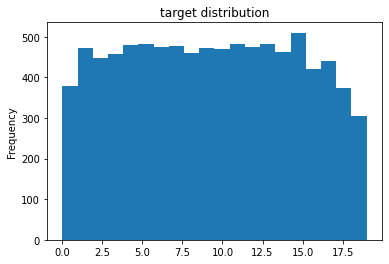

count     9027.000000
mean      1051.566080
std       2921.679957
min         30.000000
25%        234.000000
50%        462.000000
75%        917.000000
max      68941.000000
Name: length, dtype: float64

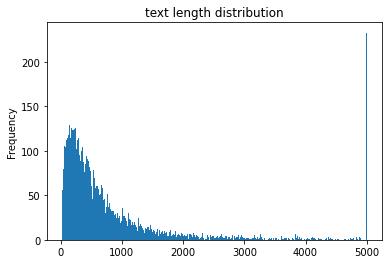

In [33]:
train.target.plot.hist(bins=20, title="target distribution")
plt.show()

lengths = train.length.copy()
display(lengths.describe())
seq_max_len = 5000

lengths[lengths > seq_max_len] = seq_max_len
lengths.plot.hist(bins=500, title="text length distribution")
plt.show()

Epoch 1/1000
29/29 [==============================] - 1s 13ms/step - loss: 2.9922 - accuracy: 0.0609 - val_loss: 2.9871 - val_accuracy: 0.0631 - lr: 0.0010
Epoch 2/1000
29/29 [==============================] - 0s 8ms/step - loss: 2.9823 - accuracy: 0.0722 - val_loss: 2.9745 - val_accuracy: 0.0670 - lr: 0.0010
Epoch 3/1000
29/29 [==============================] - 0s 7ms/step - loss: 2.9666 - accuracy: 0.0762 - val_loss: 2.9510 - val_accuracy: 0.0736 - lr: 0.0010
Epoch 4/1000
29/29 [==============================] - 0s 7ms/step - loss: 2.9381 - accuracy: 0.0814 - val_loss: 2.9152 - val_accuracy: 0.0952 - lr: 0.0010
Epoch 5/1000
29/29 [==============================] - 0s 7ms/step - loss: 2.9000 - accuracy: 0.0993 - val_loss: 2.8733 - val_accuracy: 0.1251 - lr: 0.0010
Epoch 6/1000
29/29 [==============================] - 0s 7ms/step - loss: 2.8471 - accuracy: 0.1206 - val_loss: 2.8142 - val_accuracy: 0.1395 - lr: 0.0010
Epoch 7/1000
29/29 [==============================] - 0s 7ms/step - l

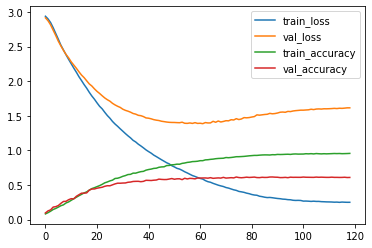

min val_loss 1.5319629907608032 max val_accuracy 0.6124030947685242


In [31]:
model_params = {
    "vocab_size": vocab_size,
    "embedding_size": 64,
    "hidden_size": 128
}
training_params = {
    "verbose": 1,
    "learning_rate": 1e-3,
    "batch_size": 256
}
model = create_simple_model(**model_params)

min_val_acc, y_test_pred = train_keras(model,
            training_params,
            np.array(train.encoded.to_list()), 
            train.target.to_numpy(),
            np.array(test.encoded.to_list())
            )

In [30]:
df_submission.target = y_test_pred.argmax(axis=-1)
df_submission.to_csv(f"submission_{min_val_acc:.4f}.csv", index=False)